In [1]:
import numpy as np 
from subprocess import Popen, PIPE, STDOUT
import os
import matplotlib.pyplot as plt
import galsim
import copy 

In [2]:
%pylab inline
from astropy.table import Table
import fitsio

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
#directories that would be using 
WLD = '/Users/Ismael/code/lensing/WeakLensingDeblending/'
repo = '/Users/Ismael/code/lensing/repo/'
os.chdir(WLD)

## How much time does simulating one square degree takes with/without bias calculation? 

In [ ]:
import time 
#timing
start = time.time()
cmd = ('./simulate.py --catalog-name OneDegSq.fits --survey-name LSST --filter-band i --output-name LSST_i')
p = Popen(cmd, shell=True, stdin=PIPE, stdout=PIPE, stderr=STDOUT, close_fds=True)
output = p.stdout.read()
end = time.time()
print (end - start)




In [ ]:
#this one includes bias calculation
start = time.time()
cmd = ('./simulate.py --catalog-name OneDegSq.fits --survey-name LSST --filter-band i --output-name LSST_i --calculate_bias')
p = Popen(cmd, shell=True, stdin=PIPE, stdout=PIPE, stderr=STDOUT, close_fds=True)
output = p.stdout.read()
end = time.time()
print (end-start)

In [ ]:
print output

## Check if biases are correctly written into the table

### Run simulations

In [6]:
###We check first for a single object and seek validation in the corresponding table of all objects mathching the id. 
#produces demo.fits file with partials, 
cmd = ('./simulate.py --catalog-name OneDegSq.fits --survey-name LSST --filter-band i --only-id 402700632300 --output-name test1 --calculate_bias')
p = Popen(cmd, shell=True, stdin=PIPE, stdout=PIPE, stderr=STDOUT, close_fds=True)
output = p.stdout.read()
print cmd
print output




./simulate.py --catalog-name OneDegSq.fits --survey-name LSST --filter-band i --only-id 402700632300 --output-name test1 --calculate_bias
['dflux', 'dx', 'dy', 'ds', 'dg1', 'dg2']



In [ ]:
cmd = ('./simulate.py --catalog-name OneDegSq.fits --survey-name LSST --filter-band i --output-name test2 --calculate_bias')
p = Popen(cmd, shell=True, stdin=PIPE, stdout=PIPE, stderr=STDOUT, close_fds=True)
output = p.stdout.read()
print cmd
print output

### Read catalogs 

In [ ]:
catalog1 = Table.read('test1.fits', hdu=1)
fits1 = fitsio.FITS('test1.fits')

In [12]:
cat = Table.read('lsst_i.fits', hdu=1)

In [11]:
cat

db_id,grp_id,grp_size,grp_rank,visible,xmin,xmax,ymin,ymax,f_disk,f_bulge,dx,dy,z,ab_mag,ri_color,flux,sigma_m,sigma_p,e1,e2,a,b,beta,psf_sigm,purity,snr_sky,snr_iso,snr_grp,snr_isof,snr_grpf,ds,dg1,dg2,bias_f,bias_s,bias_g1,bias_g2,bias_x,bias_y,bias_f_grp,bias_s_grp,bias_g1_grp,bias_g2_grp,bias_x_grp,bias_y_grp,ds_grp,dg1_grp,dg2_grp,hsm_sigm,hsm_e1,hsm_e2,g1_fit,g2_fit
int64,int64,int16,int16,int16,int32,int32,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
2214322509,2200170838,36,35,1,3236,3247,444,454,1.0,0.0,238.819,-319.693,0.516401,27.4169,0.518883,12149.3,1.08088,1.11031,0.073753,-0.146366,1.27528,0.916113,-0.552019,1.25073,0.409874,0.888373,0.888307,0.888224,0.227531,0.219346,4.20776,2.72145,2.87452,320893.0,11.2382,1.10926,-2.01458,0.0950256,0.0747375,335043.0,11.4197,1.07438,-2.39015,0.547393,0.252749,4.32714,2.7763,2.97733,nan,nan,nan,0.0,0.0
2213221225,2200170838,36,28,1,3201,3209,452,461,1.0,0.0,231.507,-318.24,2.96548,27.2805,0.0100918,13775.3,0.145562,0.151919,-0.176149,0.108134,0.179525,0.118024,1.29552,0.635012,0.591804,2.7721,2.77094,2.77033,1.8895,1.88603,3.23095,3.0282,2.80309,7081.93,-17.9639,-10.9724,6.8122,0.0016535,0.000666451,7042.09,-17.9933,-10.9651,6.79978,0.00214231,0.00169208,3.23345,3.02902,2.80398,nan,nan,nan,0.0,0.0
2213832765,2200170838,36,29,1,3215,3224,455,463,1.0,0.0,234.398,-317.7,0.683066,27.3607,-0.21286,12794.4,0.148595,0.151039,0.00700334,-0.127535,0.168959,0.130686,-0.757969,0.634851,0.628997,2.5683,2.56731,2.56686,1.73184,1.72983,3.13798,2.84177,3.06657,8087.37,-16.8191,0.433178,-7.95275,-0.000361773,1.97572e-05,8102.9,-16.8253,0.434027,-7.95754,-0.000387156,-3.96964e-05,3.13961,2.84229,3.06716,nan,nan,nan,0.0,0.0
2214602712,2206640565,2,1,1,3149,3157,457,466,1.0,0.0,221.175,-317.188,3.23816,27.4955,-0.0119038,11300.0,0.152348,0.158427,-0.130865,0.148252,0.18615,0.124684,1.14699,0.636593,0.933744,2.2555,2.25474,2.25471,1.49876,1.42649,3.76836,3.35804,3.42366,9904.27,-23.1757,-10.7491,12.2286,0.00184244,-0.00509545,10265.9,-23.7065,-10.1357,12.0776,-0.00147638,-0.01336,3.83512,3.40838,3.44279,nan,nan,nan,0.0,0.0
2201272641,2200170838,36,6,1,3177,3202,412,429,0.930439,0.0695615,228.385,-325.361,1.233,23.9101,0.417097,307089.0,0.371826,0.4614,0.457709,-0.0552518,0.612192,0.225835,-0.0600663,0.755404,0.9643,47.7854,47.5192,47.5135,30.5068,21.3511,0.0877179,0.0814383,0.0440881,334.635,-0.00868604,0.0104389,-0.00126001,3.35998e-08,4.58155e-08,-7440.37,-0.070242,0.0776311,-0.0143182,-0.00240269,-0.012364,0.12158,0.112491,0.0494165,nan,nan,nan,0.0,2.98023e-09
2209286187,2200170838,36,34,1,3182,3198,422,436,1.0,0.0,228.493,-323.751,0.793642,26.5588,1.04664,26778.3,1.90251,1.92233,0.0920748,-0.043432,2.10714,1.71775,-0.220378,2.00175,0.102007,1.15925,1.15917,1.15861,0.255394,0.212035,3.16491,2.04118,2.01912,487387.0,7.6729,0.618593,-0.310698,0.0627348,-0.0120064,668075.0,9.08937,0.143428,-0.376486,-0.0777103,-5.68559,3.58042,2.66606,2.15897,nan,nan,nan,0.0,0.0
2216818333,2200170838,36,33,1,3180,3187,460,467,1.0,0.0,227.289,-316.744,2.11807,27.9893,-0.06637,7171.1,0.132606,0.133632,0.0781198,-0.040055,0.144806,0.121433,-0.236893,0.630959,0.638744,1.45326,1.45293,1.4528,0.935421,0.640331,6.7241,6.44647,6.31057,18971.5,-77.4617,21.3988,-11.914,0.00469766,0.000198213,25099.3,-97.8489,36.9593,-26.4016,-0.0717455,-0.183476,7.6648,7.20729,6.8729,nan,nan,nan,0.0,0.0
2208277203,2200170838,36,23,1,3175,3187,453,465,0.704855,0.295145,226.742,-317.662,2.47147,26.3707,-0.014204,31844.2,0.330121,0.330877,0.00610489,0.0474397,0.346307,0.314691,0.721406,0.699737,0.944109,5.24545,5.2418,5.24172,3.02951,2.21555,0.884779,0.725059,0.743513,2793.3,-0.783912,0.0309683,0.241538,-8.43434e-05,-0.0

In [18]:
iso_gal = cat[cat['grp_size'] == 1]
grp_gal = cat[cat['grp_size'] != 1]
iso_galg  = iso_gal[(iso_gal['snr_iso'] > 10) & (iso_gal['sigma_m'] > .2)]
grp_galg  = grp_gal[(grp_gal['snr_grp'] > 10 )& (grp_gal['sigma_m'] > .2)]

#gold sample: 
gold_gal = cat[(cat['ab_mag'] < 25.3)]
#contruct vector with magnitude 'e' bias, : 



In [19]:
print len(gold_gal)
print len(iso_galg)

10658
792


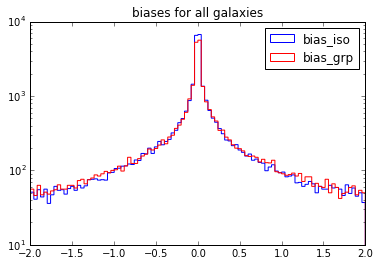

In [65]:
plt.figure()
_ = plt.hist(catalog2['bias_g1'],range=[-2,2],bins=100,histtype='step',label='bias_iso')
_ = plt.hist(catalog2['bias_g1_grp'],range=[-2,2],bins=100,color='red',histtype='step',label='bias_grp')
plt.legend()
plt.yscale('log')
plt.title('biases for all galaxies')

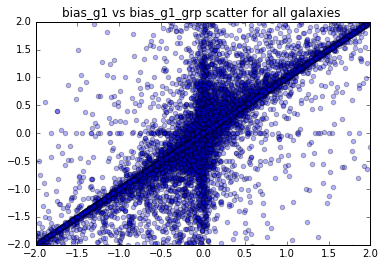

In [66]:
plt.scatter(catalog2['bias_g1'],catalog2['bias_g1_grp'], alpha=.3)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title('bias_g1 vs bias_g1_grp scatter for all galaxies ')

In [21]:
#unreasonable number of biases 
selected = (catalog2['bias_g1'] <1) & (catalog2['bias_g1'] > -1)
print len(catalog2[selected])

27790


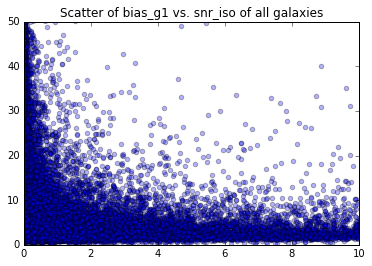

In [23]:
#check if unreasonable bias are in accordance with low size and high snr 
f = plt.figure()
axis = f.add_subplot(111)
plt.scatter(abs(catalog2['bias_g1']), catalog2['snr_iso'],alpha=.3)
axis.axes.set_xlim([0,10])
axis.axes.set_ylim([0,50])
plt.title('Scatter of bias_g1 vs. snr_iso of all galaxies')

(0, 1.6)

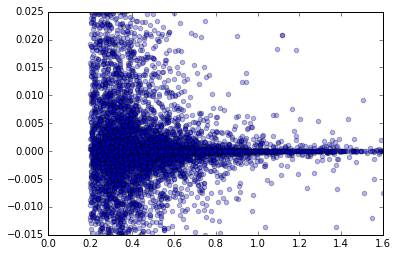

In [29]:
#now for size 
f = plt.figure()
axis = f.add_subplot(111)
plt.scatter(abs(grp_galg['sigma_m']), grp_galg['bias_g1'], alpha=.3)
axis.axes.set_ylim([-1.5e-2,2.5e-2])
axis.axes.set_xlim([0,1.6])

10400
10329


(array([  2.00000000e+00,   1.00000000e+00,   1.00000000e+01,
          3.80000000e+01,   9.70000000e+01,   3.21000000e+02,
          7.71000000e+02,   1.67400000e+03,   3.32300000e+03,
          4.16300000e+03]),
 array([ 15.15350151,  16.21970692,  17.28591232,  18.35211773,
         19.41832314,  20.48452854,  21.55073395,  22.61693935,
         23.68314476,  24.74935017,  25.81555557]),
 <a list of 10 Patch objects>)

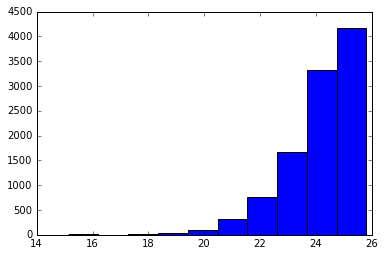

In [16]:
#print actual numbers. 
arr =   (catalog2['snr_iso'] > 10) & (catalog2['sigma_m'] > .2)
print sum(arr)
arr_grp =  (catalog2['snr_grp'] > 10) & (catalog2['sigma_m'] > .2)
print sum(arr_grp)
plt.hist(catalog2[arr]['ab_mag'])

In [68]:
print len(iso_gal)
print len(grp_gal)
print float(len(iso_gal))/(len(grp_gal) + len(iso_gal))
print len(iso_galg)
print len(grp_galg)
print float(len(iso_galg))/(len(grp_galg) + len(iso_galg))

8909
36380
0.196714433969
792
9537
0.0766773162939


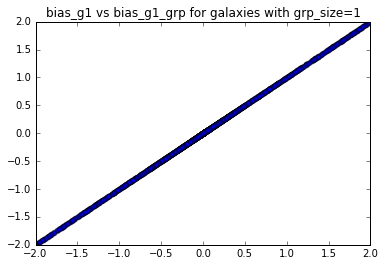

In [70]:
plt.scatter(iso_gal['bias_g1'], iso_gal['bias_g1_grp'], alpha = .3)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title('bias_g1 vs bias_g1_grp for galaxies with grp_size=1')

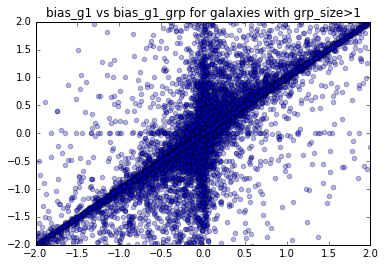

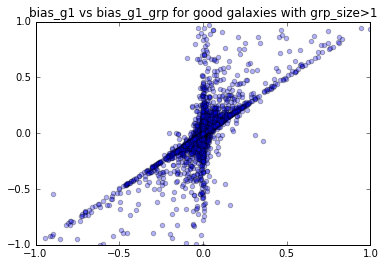

In [81]:
plt.figure() 
plt.scatter(grp_gal['bias_g1'], grp_gal['bias_g1_grp'], alpha = .3)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title('bias_g1 vs bias_g1_grp for galaxies with grp_size>1')

plt.figure()
plt.scatter(grp_galg['bias_g1'], grp_galg['bias_g1_grp'], alpha = .3)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.title('bias_g1 vs bias_g1_grp for good galaxies with grp_size>1')

#plot e1 vs b(g1) - b(g1_grp) 

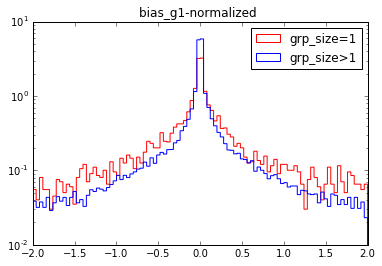

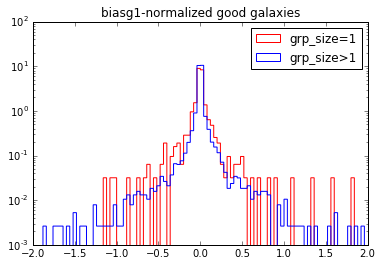

In [93]:
plt.figure()
_ = plt.hist(iso_gal['bias_g1'],range=[-2,2],bins=100,histtype='step',label='grp_size=1',color='red', normed=1)
_ = plt.hist(grp_gal['bias_g1'],range=[-2,2],bins=100,histtype='step',label='grp_size>1', normed=1)
plt.yscale('log')
plt.legend()
plt.title('bias_g1-normalized ')

plt.figure()

_ = plt.hist(iso_galg['bias_g1'],range=[-2,2],bins=100,histtype='step',label='grp_size=1',color='red',normed=1)
_ = plt.hist(grp_galg['bias_g1'],range=[-2,2],bins=100,histtype='step',label='grp_size>1',normed=1)
plt.yscale('log')
plt.legend()
plt.title('biasg1-normalized good galaxies')





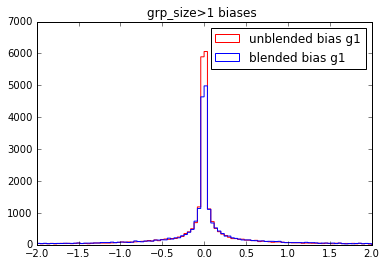

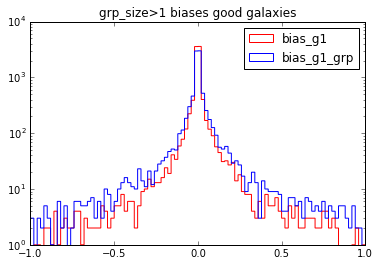

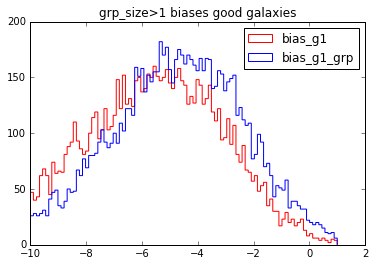

In [105]:
plt.figure() 
_ = plt.hist(grp_gal['bias_g1'],range=[-2,2],bins=100,histtype='step',label='unblended bias g1',color='red')
_ = plt.hist(grp_gal['bias_g1_grp'],range=[-2,2],bins=100,histtype='step',label='blended bias g1')
#plt.yscale('log')
plt.legend()
plt.title('grp_size>1 biases ')

plt.figure() 

_ = plt.hist(grp_galg['bias_g1'],range=[-1,1],bins=100,histtype='step',label='bias_g1',color='red')
_ = plt.hist(grp_galg['bias_g1_grp'],range=[-1,1],bins=100,histtype='step',label='bias_g1_grp')
plt.yscale('log')
plt.legend()
plt.title('grp_size>1 biases good galaxies')

plt.figure() 

_ = plt.hist(np.log(abs(grp_galg['bias_g1'])),range=[-10,1],bins=100,histtype='step',label='bias_g1',color='red')
_ = plt.hist(np.log(abs(grp_galg['bias_g1_grp'])),range=[-10,1],bins=100,histtype='step',label='bias_g1_grp')
plt.legend()
plt.title('grp_size>1 biases good galaxies')

In [91]:
#count thrown off galaxies 
print sum((abs(grp_gal['bias_g1']) < .2) & (abs(grp_gal['bias_g1_grp']) > .5))
print len(grp_gal)

1548
36380
